# HW3: machine learning for cancer type prediction based on gene expression

Implement a machine learning pipeline to predict cancer type based on gene expression [Convolutional neural network models for cancer type prediction based on gene expression
](https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-020-0677-2).


This paper introduces several convolutional neural network (CNN) models for accurate prediction of cancer types based on gene expression data from The Cancer Genome Atlas (TCGA).

The main contributions of this paper are:

Proposing three novel CNN architectures (1D-CNN, 2D-Vanilla-CNN, and 2D-Hybrid-CNN) tailored for processing unstructured gene expression data. These models achieve excellent accuracy (up to 95.7%) in classifying 33 cancer types and normal samples simultaneously.

Incorporating normal tissue samples during training to account for the influence of tissue-of-origin, which helps identify cancer-specific markers rather than just tissue-specific markers.

Developing a unique interpretation scheme based on guided saliency maps to identify important marker genes for each cancer type predicted by the CNN models.

Identifying a total of 2090 marker genes across 33 cancer types and normal samples, including well-known cancer markers like GATA3 and ESR1 for breast cancer. The marker genes exhibit differential expression between cancer types.

Demonstrating the models' applicability by achieving 88.42% accuracy in predicting breast cancer subtypes using the 1D-CNN architecture.

Overall, this paper presents novel CNN models tailored for cancer prediction from gene expression data, accounting for tissue-of-origin effects, and providing an interpretation scheme to identify potential cancer biomarkers, contributing to precision oncology and early cancer detection.


# Data loading

Data link: https://storage.googleapis.com/zifeng-drive/DS-agent-data/hw3data.zip

# Q1: Data Processing

## Task:
You are tasked with processing and merging two datasets to prepare a combined dataset for further analysis. 

- One dataset contains gene expression data: `HiSeqV2`.
- and the other contains phenotype labels from a study: `TCGA_phenotype_denseDataOnlyDownload.tsv`.

## Output Requirement:
The final output should be a single DataFrame named `merged_df` that merges the gene expression data with phenotype labels, including only the samples that appear in both datasets.

## Instructions:
Perform the following steps using pandas to accomplish the task:

1. **Load the Gene Expression Data**:
   - Load the gene expression data from the file named `HiSeqV2`, which is in tab-separated values (TSV) format. The structure should have samples as columns and gene identifiers as rows.
   - Transpose the DataFrame so that samples become rows and genes become columns.
   - Set the first row as the column headers and then remove this row from the DataFrame.

2. **Load the Phenotype Data**:
   - Load the phenotype data from the file named `TCGA_phenotype_denseDataOnlyDownload.tsv`, also in TSV format.
   - Set the 'sample' column as the index of the DataFrame.

3. **Merge the DataFrames**:
   - Merge the two prepared DataFrames based on their common sample identifiers using an inner join to ensure that only the samples present in both datasets are included.

In [3]:
# ##############
# your code starts here
# merged_df = ...
# Answer

# ##############

ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1  \
TCGA-AB-2863-03    0.7316  1.2147     0.0  11.7164  10.4861  10.2824  12.3015   
TCGA-EE-A17X-06    8.4529  3.9888     0.0  12.3562   9.7486   9.3268  11.5191   
TCGA-RP-A695-06    9.9986  3.3202     0.0  12.1335  10.8566  10.0882  11.4014   
TCGA-AB-2921-03    7.7679  0.9693  1.9537   11.609  10.1805   9.9457  12.4685   
TCGA-GN-A266-06    9.9269  1.2304     0.0  11.6483   11.469  11.1557  12.1788   
...                   ...     ...     ...      ...      ...      ...      ...   
TCGA-EE-A2GN-06    9.8075  4.9789     0.0  11.6401   9.7962    9.282   11.519   
TCGA-D3-A5GR-06    9.1462  2.5251  1.5762  11.3769  10.7846  10.7288  12.7243   
TCGA-FY-A4B4-01    9.7377   5.369     0.0  11.7748  11.5743  10.6604  12.4915   
TCGA-EE-A29L-06    8.4837  1.1355     0.0  10.9088  10.8928  10.0206  11.3775   
TCGA-DJ-A2QC-01     9.048   5.691     0.0   11.964  11.2763  10.4759  13.0106   

                   REM1   MTVR2 RTN4RL2  ...    PLVAP SLC39A13 SLC39A10  \
TCGA-AB-2863-03     0.0  3.7602  3.7602  ...   4.1303   7.7438  10.8469   
TCGA-EE-A17X-06  3.4802  1.0625  5.4653  ...  10.1748  11.4985   7.7989   
TCGA-RP-A695-06  3.9187   0.514  6.4002  ...  10.2073  10.6388   9.3477   
TCGA-AB-2921-03     0.0  3.5868  2.6481  ...   4.4642   9.1352  10.1278   
TCGA-GN-A266-06  6.1568     0.0  4.8881  ...  11.1842  10.5343   9.7992   
...                 ...     ...     ...  ...      ...      ...      ...   
TCGA-EE-A2GN-06  4.3281     0.0  5.5681  ...  11.1496  10.6225  10.3043   
TCGA-D3-A5GR-06  7.3912     0.0  4.5358  ...  11.1809  10.0867   9.4807   
TCGA-FY-A4B4-01  4.3908   0.799  7.0154  ...  12.8721  10.2988  11.6348   
TCGA-EE-A29L-06   1.483     0.0   3.884  ...   8.7684   9.9078  10.0009   
TCGA-DJ-A2QC-01  7.2968     0.0  6.1803  ...  14.4407  10.1975  10.1185   

                SLC39A11 LOC96610 SLC39A14   SCN2B sample_type_id  \
TCGA-AB-2863-03   9.0301  12.8885  10.4216     0.0              3   
TCGA-EE-A17X-06    9.214  10.2693  11.2991     0.0              6   
TCGA-RP-A695-06  10.7648  12.4877  12.1193  2.2785              6   
TCGA-AB-2921-03   9.5021   11.158   9.2801     0.0              3   
TCGA-GN-A266-06   8.1433  14.7351  10.7692  1.0071              6   
...                  ...      ...      ...     ...            ...   
TCGA-EE-A2GN-06   8.8315  11.6034  10.6413  3.7447              6   
TCGA-D3-A5GR-06     8.63  16.4119  11.9895  2.1913              6   
TCGA-FY-A4B4-01   9.4193  12.1524  10.6719  7.4654              1   
TCGA-EE-A29L-06    9.843   11.274  11.3716     0.0              6   
TCGA-DJ-A2QC-01   8.9003  11.8292  10.1594   8.469              1   

                                                     sample_type  \
TCGA-AB-2863-03  Primary Blood Derived Cancer - Peripheral Blood   
TCGA-EE-A17X-06                                       Metastatic   
TCGA-RP-A695-06                                       Metastatic   
TCGA-AB-2921-03  Primary Blood Derived Cancer - Peripheral Blood   
TCGA-GN-A266-06                                       Metastatic   
...                                                          ...   
TCGA-EE-A2GN-06                                       Metastatic   
TCGA-D3-A5GR-06                                       Metastatic   
TCGA-FY-A4B4-01                                    Primary Tumor   
TCGA-EE-A29L-06                                       Metastatic   
TCGA-DJ-A2QC-01                                    Primary Tumor   

                        _primary_disease  
TCGA-AB-2863-03   acute myeloid leukemia  
TCGA-EE-A17X-06  skin cutaneous melanoma  
TCGA-RP-A695-06  skin cutaneous melanoma  
TCGA-AB-2921-03   acute myeloid leukemia  
TCGA-GN-A266-06  skin cutaneous melanoma  
...                                  ...  
TCGA-EE-A2GN-06  skin cutaneous melanoma  
TCGA-D3-A5GR-06  skin cutaneous melanoma  
TCGA-FY-A4B4-01        thyroid carcinoma  
TCGA-EE-A29L-06  skin cutaneous melanoma  
TCGA-DJ-A2QC-01        

In [4]:
###### testing script ######
assert len(merged_df) == 956
assert len(merged_df.columns) == 1003 or len(merged_df.columns) == 1002
############################

# Q2. Data standardization

### Task:
You are provided with a DataFrame containing gene expression data along with metadata fields such as `sample_type_id`, `sample_type`, and `_primary_disease`. The objective is to preprocess this data for a machine learning model that classifies diseases based on gene expression profiles.

### Input
- `merged_df` from Q1

### Output Requirement:
Create a DataFrame `filtered_df` that retains only the gene expression columns and the `_primary_disease` column. The `_primary_disease` column should be transformed into an ordinal numeric format for use as a target variable in machine learning models. Additionally, ensure that all NaN values in the gene expression columns are appropriately filled.

### Instructions:
1. **Filter the DataFrame**:
   - Exclude all columns except the gene expression columns and the `_primary_disease` column from the DataFrame. Assume that all columns except `sample_type_id`, `sample_type`, and `_primary_disease` are gene expression columns.
   
2. **Encode the Disease Labels**:
   - Apply ordinal encoding to the `_primary_disease` column to convert the disease labels from text to a numeric format. Handle any NaN values by replacing them with the label 'Unknown' before encoding.

3. **Handle Missing Data**:
   - Fill in NaN values in the gene expression columns. Use the mean of each column as the fill value.

In [5]:
# ##############
# your code starts here
# merged_df = ...
# Answer

# ##############

                ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1  \
TCGA-AB-2863-03    0.7316  1.2147     0.0  11.7164  10.4861  10.2824  12.3015   
TCGA-EE-A17X-06    8.4529  3.9888     0.0  12.3562   9.7486   9.3268  11.5191   
TCGA-RP-A695-06    9.9986  3.3202     0.0  12.1335  10.8566  10.0882  11.4014   
TCGA-AB-2921-03    7.7679  0.9693  1.9537   11.609  10.1805   9.9457  12.4685   
TCGA-GN-A266-06    9.9269  1.2304     0.0  11.6483   11.469  11.1557  12.1788   

                   REM1   MTVR2 RTN4RL2  ... OR11G2    PPID    PLVAP SLC39A13  \
TCGA-AB-2863-03     0.0  3.7602  3.7602  ...    0.0  9.2526   4.1303   7.7438   
TCGA-EE-A17X-06  3.4802  1.0625  5.4653  ...    0.0  9.5102  10.1748  11.4985   
TCGA-RP-A695-06  3.9187   0.514  6.4002  ...    0.0   9.821  10.2073  10.6388   
TCGA-AB-2921-03     0.0  3.5868  2.6481  ...    0.0  9.2644   4.4642   9.1352   
TCGA-GN-A266-06  6.1568     0.0  4.8881  ...    0.0  9.2235  11.1842  10.5343   

                SLC39A10 S

In [6]:
filtered_df

ARHGEF10L   HIF3A   RNF17    RNF10    RNF11    RNF13  GTF2IP1  \
TCGA-AB-2863-03    0.7316  1.2147     0.0  11.7164  10.4861  10.2824  12.3015   
TCGA-EE-A17X-06    8.4529  3.9888     0.0  12.3562   9.7486   9.3268  11.5191   
TCGA-RP-A695-06    9.9986  3.3202     0.0  12.1335  10.8566  10.0882  11.4014   
TCGA-AB-2921-03    7.7679  0.9693  1.9537   11.609  10.1805   9.9457  12.4685   
TCGA-GN-A266-06    9.9269  1.2304     0.0  11.6483   11.469  11.1557  12.1788   
...                   ...     ...     ...      ...      ...      ...      ...   
TCGA-EE-A2GN-06    9.8075  4.9789     0.0  11.6401   9.7962    9.282   11.519   
TCGA-D3-A5GR-06    9.1462  2.5251  1.5762  11.3769  10.7846  10.7288  12.7243   
TCGA-FY-A4B4-01    9.7377   5.369     0.0  11.7748  11.5743  10.6604  12.4915   
TCGA-EE-A29L-06    8.4837  1.1355     0.0  10.9088  10.8928  10.0206  11.3775   
TCGA-DJ-A2QC-01     9.048   5.691     0.0   11.964  11.2763  10.4759  13.0106   

                   REM1   MTVR2 RTN4RL2  ... OR11G2    PPID    PLVAP SLC39A13  \
TCGA-AB-2863-03     0.0  3.7602  3.7602  ...    0.0  9.2526   4.1303   7.7438   
TCGA-EE-A17X-06  3.4802  1.0625  5.4653  ...    0.0  9.5102  10.1748  11.4985   
TCGA-RP-A695-06  3.9187   0.514  6.4002  ...    0.0   9.821  10.2073  10.6388   
TCGA-AB-2921-03     0.0  3.5868  2.6481  ...    0.0  9.2644   4.4642   9.1352   
TCGA-GN-A266-06  6.1568     0.0  4.8881  ...    0.0  9.2235  11.1842  10.5343   
...                 ...     ...     ...  ...    ...     ...      ...      ...   
TCGA-EE-A2GN-06  4.3281     0.0  5.5681  ...    0.0  9.1789  11.1496  10.6225   
TCGA-D3-A5GR-06  7.3912     0.0  4.5358  ...    0.0  9.5456  11.1809  10.0867   
TCGA-FY-A4B4-01  4.3908   0.799  7.0154  ...    0.0  8.9574  12.8721  10.2988   
TCGA-EE-A29L-06   1.483     0.0   3.884  ...    0.0  9.6269   8.7684   9.9078   
TCGA-DJ-A2QC-01  7.2968     0.0  6.1803  ...    0.0  9.2531  14.4407  10.1975   

                SLC39A10 SLC39A11 LOC96610 SLC39A14   SCN2B _primary_disease  
TCGA-AB-2863-03  10.8469   9.0301  12.8885  10.4216     0.0              0.0  
TCGA-EE-A17X-06   7.7989    9.214  10.2693  11.2991     0.0             18.0  
TCGA-RP-A695-06   9.3477  10.7648  12.4877  12.1193  2.2785             18.0  
TCGA-AB-2921-03  10.1278   9.5021   11.158   9.2801     0.0              0.0  
TCGA-GN-A266-06   9.7992   8.1433  14.7351  10.7692  1.0071             18.0  
...                  ...      ...      ...      ...     ...              ...  
TCGA-EE-A2GN-06  10.3043   8.8315  11.6034  10.6413  3.7447             18.0  
TCGA-D3-A5GR-06   9.4807     8.63  16.4119  11.9895  2.1913             18.0  
TCGA-FY-A4B4-01  11.6348   9.4193  12.1524  10.6719  7.4654             20.0  
TCGA-EE-A29L-06  10.0009    9.843   11.274  11.3716     0.0             18.0  
TCGA-DJ-A2QC-01  10.1185   8.9003  11.8292  10.1594   8.469             20.0  

[956 rows x 1000 columns]

In [7]:
###### testing script ######
assert len(filtered_df) == 956
assert len(filtered_df.columns) == 1000
############################

# Q3. Visualization

### Task:
You are tasked with visualizing high-dimensional gene expression data to explore patterns related to different primary diseases. This visualization will utilize the t-SNE technique to reduce the dimensionality of the data and then plot the results to identify possible clusters by disease type.

### Input
- `merged_df` from Q1

### Output Requirement:
Create a scatter plot of the t-SNE transformed gene expression data, named `X_embedded`, where each point represents a sample colored by its corresponding disease type. The plot should clearly display the clusters of samples, facilitating the identification of patterns related to different diseases.

### Instructions:
1. **Prepare the Data**:
   - From the `merged_df` DataFrame, remove the columns `sample_type_id`, `sample_type`, and `_primary_disease` to isolate the gene expression data.

2. **t-SNE Transformation**:
   - Apply the t-SNE algorithm to the filtered gene expression data with the following parameters:
     - Number of components: 2
     - Learning rate: 'auto'
     - Initialization: 'random'
     - Perplexity: 3
   - This will project the high-dimensional data into two dimensions.

3. **Dataframe Preparation**:
   - Create a new DataFrame from the t-SNE output and include the `_primary_disease` column from the original data. Ensure the data is sorted by `_primary_disease` for better visual grouping in the plot.

4. **Generate the Plot**:
   - Use Plotly Express to create a scatter plot of the t-SNE results:
     - Map the t-SNE components to the x and y axes.
     - Color the points according to `_primary_disease`.
     - Use an appropriate color scheme and Plotly template to enhance visual clarity.
   - Display the scatter plot.

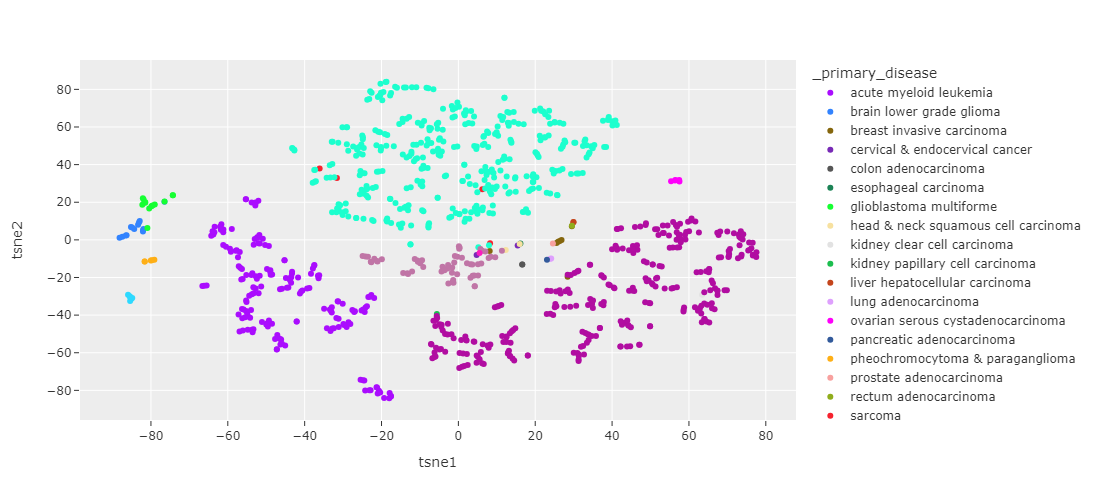

In [8]:
# ##############
# your code starts here
# Answer
# X_embedded = ...

# ##############

In [9]:
###### testing script ######
assert X_embedded.shape == (956,2)
############################

# Q4. Visualization

Use a heatmap to visualize the expression levels of genes across different samples.
### Task:
You are tasked with creating a heatmap to visualize the gene expression data from a set of samples. This visualization will help identify patterns and variations across different samples.

### Input:
- `merged_df` from Q1

### Output Requirement:
Produce a heatmap of the gene expression data, utilizing a color scheme that ranges from cool to warm to represent the range of expression levels.

### Instructions:
1. **Data Preparation**:
   - From the `merged_df` DataFrame, remove the columns `sample_type_id`, `sample_type`, and `_primary_disease` to focus solely on gene expression data.
   - Ensure that any missing data are removed from the dataset to prevent issues during visualization.

2. **Visualization**:
   - Convert the filtered gene expression data to a floating-point format suitable for visualization.
   - Use the seaborn library to generate a heatmap:
     - Set the color map to 'coolwarm' to visually distinguish between low and high expression values.
   - Display the heatmap.

<Axes: >

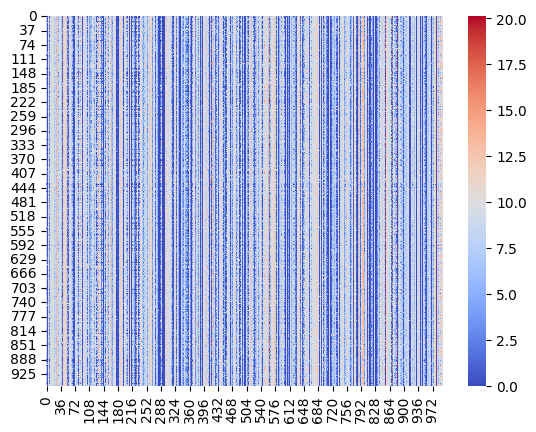

In [10]:
# ##############
# your code starts here
# Answer

# ##############

# Q5. Visualization
Calculate the correlation between different genes and visualize it as a heatmap.

### Task:
Create a heatmap to visualize the correlation matrix of gene expression data from various samples. This visualization will assist in identifying relationships and patterns of co-expression between genes.

### Input:
- `merged_df` from Q1

### Output Requirement:
Generate a heatmap that displays the correlation coefficients between gene expression variables. Save it in the variable `corr_matrix`. Using a color scheme that highlights positive and negative correlations.

### Instructions:
1. **Data Preparation**:
   - From the `merged_df` DataFrame, remove the columns `sample_type_id`, `sample_type`, and `_primary_disease` to isolate the gene expression data.
   - Ensure that the data is in floating-point format, which is necessary for calculating correlation coefficients.

2. **Calculate Correlations**:
   - Compute the correlation matrix of the gene expression data. This involves transposing the data matrix so that genes (variables) are along the rows, which is a requirement for computing correlations in this context.

3. **Visualization**:
   - Use the seaborn library to create a heatmap of the correlation matrix:
     - Set the color map to 'coolwarm' to effectively represent both positive (warm) and negative (cool) correlations.
   - Ensure that the heatmap is clear and properly annotated, if necessary, to facilitate interpretation.

/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



<Axes: >

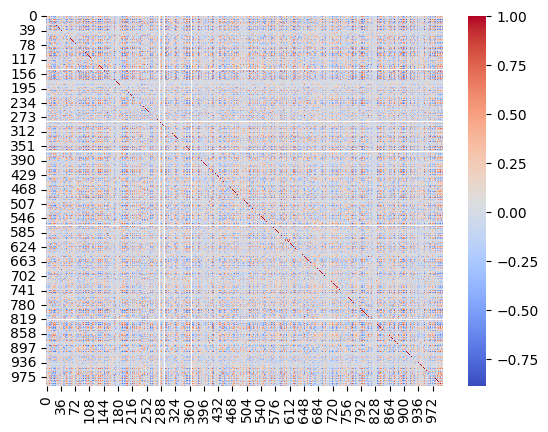

In [11]:
# ##############
# your code starts here
# Answer

# ##############

In [12]:
###### testing script ######
assert corr_matrix.shape == (999, 999)
# ##############

# Q6. Visualization

Use clustering algorithms (k-means) to group similar samples and visualize them as a heatmap.

### Task:
Use KMeans clustering to categorize gene expression data into five distinct clusters. This will help identify inherent groupings among the samples based on their gene expression profiles. Subsequently, visualize the cluster assignments to examine the distribution of samples across these clusters.

### Input:
- `merged_df` from Q1

### Output Requirement:
- Conduct KMeans clustering to group the samples into exactly five clusters.
- Store the resulting cluster assignments in a variable named `sample_clusters`.
- Visualize these cluster assignments using a heatmap.

### Instructions:
1. **Data Preparation**:
   - Remove the columns `sample_type_id`, `sample_type`, and `_primary_disease` from the `merged_df` DataFrame to isolate the gene expression data.
   - Convert this data to a floating-point format to ensure compatibility with the clustering algorithm.

2. **Perform Clustering**:
   - Initialize and configure the KMeans algorithm with `n_clusters=5`, indicating the algorithm should identify five distinct clusters.
   - Fit the algorithm to your prepared gene expression data and obtain cluster assignments for each sample.

3. **Visualization**:
   - Reshape the `sample_clusters` array into a 2D array with one column to prepare it for heatmap visualization.
   - Use the seaborn library to create a heatmap of the reshaped `sample_clusters`. Apply a 'coolwarm' color map to clearly differentiate the clusters.
   - Display the heatmap to analyze the clustering results.

<Axes: >

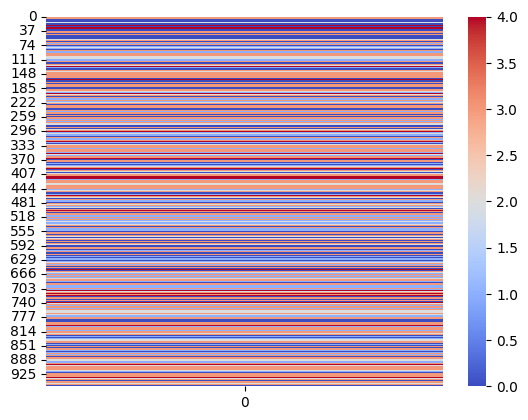

In [13]:
# ##############
# your code starts here
# Answer

# ##############

In [14]:
###### testing script ######
assert len(sample_clusters) == 956
assert set(sample_clusters) == {0,1,2,3,4}
# ##############

# Q7. Dimensionality reduction

### Task:
Apply feature selection techniques to gene expression data to identify the top 100 most informative genes that best differentiate between various primary diseases.

### Input:
- `merged_df` from Q1

### Output Requirement:
- Select exactly 100 features (genes) using the Chi-squared test.
- Store the selected feature matrix in a variable named `X`.

### Instructions:
1. **Data Preparation**:
   - From the `merged_df` DataFrame, remove the columns `sample_type_id`, `sample_type`, and `_primary_disease` to isolate the gene expression data. Ensure this data is in floating-point format.
   - Convert the `_primary_disease` column to a numerical format suitable for feature selection using an Ordinal Encoder. Store this in a variable `Y`.

2. **Feature Selection**:
   - Initialize the `SelectKBest` feature selection method using the `chi2` score function to handle positive feature values typically found in gene expression data.
   - Specify that the top 100 features are to be selected by setting `k=100`.
   - Fit this feature selector to the gene expression data (`X_filtered`) and the encoded disease labels (`Y`) to identify the most relevant features.

3. **Post Selection**:
   - Ensure that the selected features are stored in the variable `X`, which should contain the filtered set of features post-selection.

In [15]:
# ##############
# your code starts here
# Answer

# ##############

In [16]:
###### testing script ######
assert X.shape == (956, 100)
# ##############

# Q8. Train test split

### Task:
Split the dataset into three distinct subsets: training, validation, and testing. The data should be distributed among these subsets in the ratios of 70%, 10%, and 20%, respectively. The features are the gene expressions and the target is the disease type.

### Input
`merged_df` from Q1

### Output Requirement:
- Generate six variables: `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, `y_test`.
- Ensure that the target variable is separated from the feature columns.

### Instructions:
1. **Data Preparation**:
   - Identify and separate your target variable (e.g., `_primary_disease`) from the feature columns. Assume the rest of the columns are feature columns.

2. **First Split - Train and Temp**:
   - Use the `train_test_split` function to divide the data into initial training (70% of the data) and a temporary subset (the remaining 30%).

3. **Second Split - Validation and Test**:
   - Split the temporary subset from the first split into validation and test sets in the proportions that represent 10% and 20% of the original dataset, respectively. This equates to splitting the temporary subset into approximately 33.3% for validation and 66.7% for testing.

4. **Verify Proportions**:
   - Check the proportions of the resulting splits to ensure they match the required distributions.


In [17]:
# ##############
# your code starts here
# Answer

# ##############

In [18]:
###### testing script ######
assert x_train.shape == (669, 999)
assert x_test.shape == (192, 999)
assert x_val.shape == (95, 999)
assert len(y_train) == 669
assert len(y_val) == 95
assert len(y_test) == 192
# ##############

# Q9. Model training

### Task:
Train a Random Forest classifier using the training data (`x_train`, `y_train`) and then evaluate its performance in terms of accuracy on the test data (`x_test`, `y_test`). The classifier must be named `rf_model`.

### Input
`x_train`, `x_test`, `y_train`, `y_test` from Q8.

### Output Requirement:
- Train a Random Forest classifier.
- Report the accuracy of the model on the test dataset.

### Instructions:
1. **Model Training**:
   - Import the `RandomForestClassifier` from `sklearn.ensemble`.
   - Instantiate the Random Forest model.
   - Fit the model to the training data using `x_train` and `y_train`.

2. **Model Evaluation**:
   - Use the trained model to make predictions on `x_test`.
   - Calculate the accuracy of these predictions by comparing them to `y_test`.
   - Use the `accuracy_score` function from `sklearn.metrics` to compute the accuracy.

3. **Reporting**:
   - Print the accuracy of the model on the test data.

In [19]:
# ##############
# your code starts here
# Answer

# ##############

Accuracy of the Random Forest model on the test data: 0.9322916666666666


In [20]:
###### testing script ######
from sklearn.utils.validation import check_is_fitted
fitted = False
try:
    check_is_fitted(rf_model)
    fitted = True
except:
    fitted = False
assert fitted
# ##############

# Q10. Model Evaluation

### Task:
Generate and plot a confusion matrix for the predictions made by your trained model using the test dataset (`x_test`, `y_test`). This visualization will help assess the model's performance across different classes in a multi-class classification setting.

### Input
- `x_test`, `y_test`: Q8
- `rf_model`: Q9

### Output Requirement:
- Confusion matrix saved in `cm`, in `numpy.array`.
- A plotted confusion matrix that visually represents the accuracy of predictions across all classes.

### Instructions:
1. **Predict Test Data**:
   - Use the trained model to make predictions on `x_test`.

2. **Generate Confusion Matrix**:
   - Utilize the `confusion_matrix` function from `scikit-learn.metrics` to compute the confusion matrix using `y_test` and the predictions.

3. **Plot the Matrix**:
   - Use `matplotlib` or `seaborn` to create a heatmap of the confusion matrix.
   - Ensure that the plot includes color encoding for different values, labels for each class, and a title.

Provide the Python code that performs these steps to produce the confusion matrix visualization.

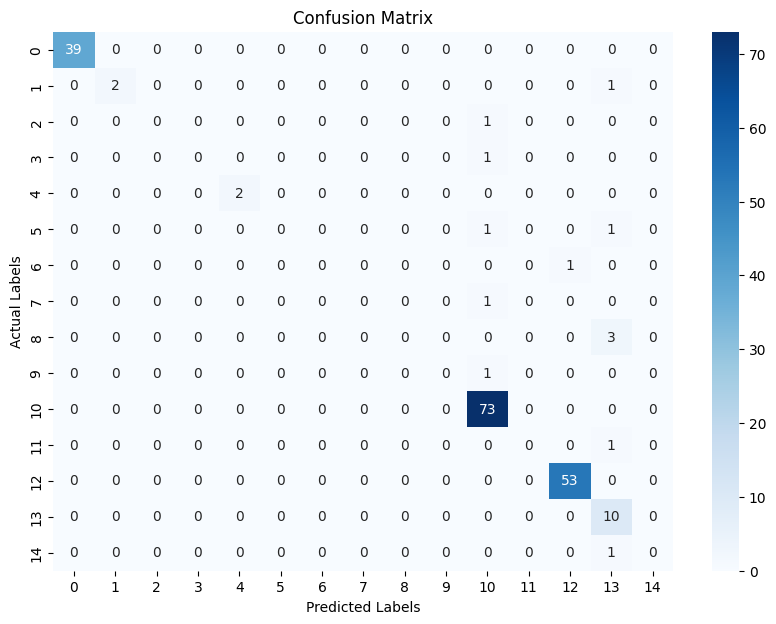

In [21]:
# ##############
# your code starts here
# Answer

# ##############

In [29]:
###### testing script ######
import numpy as np
num_classes = len(np.unique(y_test))
assert cm.shape == (num_classes, num_classes)
assert cm.sum() == len(y_test)
###### testing script ######